In [11]:
# change dir to root
import os
import sys
from utils.classes import TennisMatchDataset
import numpy as np
import pandas as pd
import json
import os 
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Subset, TensorDataset
import torch.optim as optim
from tqdm.notebook import tqdm
import torch 
from torch.utils.data import random_split
import utils.constants as c
import data.utils.constants as c2
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

MAX_PADDED = 45


In [12]:


tennis_dataset = TennisMatchDataset([   
                                        # 'past-french-open-atp-singles', 
                                        # 'past-australian-open-atp-singles',
                                        'past-rome-atp-singles', 
                                        # 'past-madrid-atp-singles',
                                        # 'past-monte-carlo-atp-singles',
                                        # 'past-lyon-atp-singles',
                                        # 'past-barcelona-atp-singles',
                                        # 'past-munich-atp-singles',
                                        # 'past-geneva-atp-singles',
                                        # 'past-estoril-atp-singles',
                                        # 'past-houston-atp-singles',
                                        # 'past-marrakech-atp-singles',
                                        # 'past-bucharest-atp-singles',
                                        # 'past-doha-atp-singles',
                                        # 'past-dubai-atp-singles',
                                        # 'past-indian-wells-atp-singles',
                                        # 'past-miami-atp-singles',
                                        # 'past-acapulco-atp-singles',
                                        # 'past-rio-de-janeiro-atp-singles',
                                        # 'past-santiago-atp-singles',
                                        # 'past-brisbane-atp-singles',
                                        # 'past-hong-kong-atp-singles',
                                        # 'past-auckland-atp-singles',
                                        # 'past-adelaide-atp-singles',
                                        # 'past-montpellier-atp-singles',
                                        # 'past-marseille-atp-singles',
                                        # 'past-cordoba-atp-singles',
                                        # 'past-dallas-atp-singles',
                                        # 'past-french-open-2023-atp-singles',
                                        # 'past-australian-open-2023-atp-singles',
                                        # 'past-rome-2023-atp-singles',
                                        # 'past-madrid-2023-atp-singles',
                                        # 'past-monte-carlo-2023-atp-singles',
                                        # 'past-lyon-2023-atp-singles',
                                        # 'past-barcelona-2023-atp-singles',
                                        # 'past-munich-2023-atp-singles',
                                        # 'past-geneva-2023-atp-singles',
                                        # 'past-estoril-2023-atp-singles',
                                        # 'past-houston-2023-atp-singles',
                                        # 'past-marrakech-2023-atp-singles', 
                                        # 'past-bucharest-2023-atp-singles', ###
                                        # 'past-doha-2023-atp-singles',
                                        # 'past-dubai-2023-atp-singles',
                                        # 'past-indian-wells-2023-atp-singles',
                                        # 'past-miami-2023-atp-singles',
                                        # 'past-acapulco-2023-atp-singles',
                                        # 'past-rio-de-janeiro-2023-atp-singles',
                                        # 'past-santiago-2023-atp-singles',
                                        # 'past-auckland-2023-atp-singles',
                                        # 'past-adelaide-2023-atp-singles',
                                        # 'past-montpellier-2023-atp-singles',
                                        # 'past-marseille-2023-atp-singles',
                                        # 'past-cordoba-2023-atp-singles',
                                        # 'past-dallas-2023-atp-singles',
                                        # 'past-stuttgart-2023-atp-singles',
                                        # 'past-hertogenbosch-2023-atp-singles',
                                        # 'past-halle-2023-atp-singles',
                                        # 'past-london-2023-atp-singles',
                                        # 'past-mallorca-2023-atp-singles',
                                        # 'past-eastbourne-2023-atp-singles',
                                        # 'past-wimbledon-2023-atp-singles',
                                        # 'past-hamburg-2023-atp-singles',
                                        #   'past-bastad-2023-atp-singles',
                                        #   'past-gstaad-2023-atp-singles', ###
                                        #   'past-newport-2023-atp-singles',
                                        #   'past-umag-2023-atp-singles',
                                        #   'past-atlanta-2023-atp-singles',
                                        #   'past-washington-2023-atp-singles',
                                        #   # 'past-montreal-2023-atp-singles', ###
                                        #   'past-cincinnati-2023-atp-singles',
                                        #   'past-winston-salem-2023-atp-singles',
                                        #   'past-us-open-2023-atp-singles', ###
                                        #   'past-chengdu-2023-atp-singles',
                                        #   'past-zhuhai-2023-atp-singles', ###
                                        #   'past-tokyo-2023-atp-singles',
                                        #   'past-beijing-2023-atp-singles', ###
                                        #   'past-shanghai-2023-atp-singles',
                                        #   'past-stockholm-2023-atp-singles',
                                        #   'past-antwerp-2023-atp-singles', ###
                                        #   # 'past-almaty-2023-atp-singles', ###
                                        #   'past-vienna-2023-atp-singles',
                                        #   'past-basel-2023-atp-singles',
                                        #   'past-paris-2023-atp-singles',
                                        #   'past-metz-2023-atp-singles',
                                        #   'past-finals-turin-2023-atp-singles',
                                     ])

Loading data for tournaments {'past-rome-atp-singles'} ...
... loaded 131 matches
Updating id table ...
... id table updated


In [13]:
# nb_errors = 0
# list_vectors = []
# list_labels = []
# for match_id in tqdm(tennis_dataset.get_matches_ids()):
#     nb_try = 0
#     while nb_try < 3:
#         try :
#             vector = tennis_dataset.get_match(match_id).get_feature_vector()
#             list_vectors.append(vector)
#             label = tennis_dataset.get_match(match_id).get_label()
#             list_labels.append(label)
#             break
#         except Exception as e:
#             nb_try += 1
#             if nb_try == 3 :
#                 tqdm.write(f"error : {e} for match_id : {match_id} opposing {tennis_dataset.get_match(match_id).get_players()[0]} to {tennis_dataset.get_match(match_id).get_players()[1]}")
#                 nb_errors += 1
    
    
# tqdm.write(f'Number of errors : {nb_errors} over {len(tennis_dataset.get_matches_ids())} matches')
list_vectors, list_labels, lst_match_id, nb_errors = tennis_dataset.get_past_vectors()

tqdm.write(f'Number of errors : {nb_errors}')


100%|██████████| 1/1 [00:00<00:00, 18.28it/s]

Error 'm0tb' for match b5BkvQFl in tournament past-rome-atp-singles
Number of errors : 1


In [14]:
tqdm.write(f'Number of vectors : {len(list_vectors)}')
input_shapes = []
for i in range(len(list_vectors[0])):
    tqdm.write(f'Input number {i} is shape : {len(list_vectors[0][i])}')
    input_shapes.append(len(list_vectors[0][i]))
tqdm.write(f'Input shapes : {input_shapes}')

Number of vectors : 130
Input number 0 is shape : 2
Input number 1 is shape : 40
Input number 2 is shape : 40
Input number 3 is shape : 4
Input number 4 is shape : 4
Input number 5 is shape : 15
Input number 6 is shape : 15
Input shapes : [2, 40, 40, 4, 4, 15, 15]


In [19]:
# remove vectors where there is too much missing values ie too much c.PADDING values in all the vectors 
new_list_vectors = []
new_list_labels = []
for i in tqdm(range(len(list_vectors))) :
    vector = list_vectors[i]
    num_padding = 0
    for spe_vec in vector :
        num_padding += spe_vec.count(c.PADDING)
    if num_padding < MAX_PADDED and list_labels[i] != c.PADDING:
        new_list_vectors.append(vector)
        new_list_labels.append(list_labels[i])
tqdm.write(f'Number of vectors after removing vectors with too much missing values : {len(new_list_vectors)} over {len(list_vectors)}')


  0%|          | 0/130 [00:00<?, ?it/s]

Number of vectors after removing vectors with too much missing values : 124 over 130


In [20]:
# create 7 tensors : [tournament_features_vector, player1_features_vector, player2_features_vector, h2h_overall_vector, h2h_surface_vector, shape_overall_player1, shape_overall_player2]
tournament_features_vector = []
player1_features_vector = []
player2_features_vector = []
h2h_overall_vector = []
h2h_surface_vector = []
shape_overall_player1_vector = []
shape_overall_player2_vector = []

for vector in new_list_vectors:
    tournament_features_vector.append(vector[0])
    player1_features_vector.append(vector[1])
    player2_features_vector.append(vector[2])
    h2h_overall_vector.append(vector[3])
    h2h_surface_vector.append(vector[4])
    shape_overall_player1_vector.append(vector[5])
    shape_overall_player2_vector.append(vector[6])

# convert to pytorch tensor
tournament_features_tensor = torch.tensor(tournament_features_vector, dtype=torch.float)
tournament_features_mask = torch.zeros_like(tournament_features_tensor)
tournament_features_mask[tournament_features_tensor != c.PADDING] = 1.
player1_features_tensor = torch.tensor(player1_features_vector, dtype=torch.float)
player1_features_mask = torch.zeros_like(player1_features_tensor)
player1_features_mask[player1_features_tensor != c.PADDING] = 1.
player2_features_tensor = torch.tensor(player2_features_vector, dtype=torch.float)
player2_features_mask = torch.zeros_like(player2_features_tensor)
player2_features_mask[player2_features_tensor != c.PADDING] = 1.
h2h_overall_tensor = torch.tensor(h2h_overall_vector, dtype=torch.float)
h2h_overall_mask = torch.zeros_like(h2h_overall_tensor)
h2h_overall_mask[h2h_overall_tensor != c.PADDING] = 1.
h2h_surface_tensor = torch.tensor(h2h_surface_vector, dtype=torch.float)
h2h_surface_mask = torch.zeros_like(h2h_surface_tensor)
h2h_surface_mask[h2h_surface_tensor != c.PADDING] = 1.
shape_overall_player1_tensor = torch.tensor(shape_overall_player1_vector, dtype=torch.float)
shape_overall_player1_mask = torch.zeros_like(shape_overall_player1_tensor)
shape_overall_player1_mask[shape_overall_player1_tensor != c.PADDING] = 1.
shape_overall_player2_tensor = torch.tensor(shape_overall_player2_vector, dtype=torch.float)
shape_overall_player2_mask = torch.zeros_like(shape_overall_player2_tensor)
shape_overall_player2_mask[shape_overall_player2_tensor != c.PADDING] = 1.

label_vector = []
for label in new_list_labels:
    label_vector.append(label)

label_tensor = torch.tensor(label_vector)

dataset = TensorDataset(tournament_features_tensor, 
                        tournament_features_mask, 
                        player1_features_tensor, 
                        player1_features_mask, 
                        player2_features_tensor, 
                        player2_features_mask,
                        h2h_overall_tensor, 
                        h2h_overall_mask, 
                        h2h_surface_tensor, 
                        h2h_surface_mask, 
                        shape_overall_player1_tensor, 
                        shape_overall_player1_mask, 
                        shape_overall_player2_tensor, 
                        shape_overall_player2_mask, 
                        label_tensor)

# split the dataset into train and validation 
# train_size = int(0.85 * len(dataset))
# val_size = len(dataset) - train_size
# train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

N_FOLDS = 5
kf = KFold(n_splits=N_FOLDS, shuffle=True, random_state=42)


## Model

In [21]:
#  create a model with 1 dense layer for all parts of inputs, then concatenate them, 1 dense layer and eventually atanh activation function


PATIENCE = 70
N_EPOCHS = 2000
LEARNING_RATE = 5e-4
WEIGHT_DECAY = 1e-4
DROPOUT = 0.6
N_UNITS = 16
N_UNITS_OVERALL = 4
N_UNITS_SURFACE = 4
STEP_SIZE = 30
GAMMA = 0.8

class TennisMatchPredictor(nn.Module):
    def __init__(self, input_shapes):
        super(TennisMatchPredictor, self).__init__()
        self.fctournament = nn.Linear(input_shapes[0], 2)
        self.fcplayer1 = nn.Linear(input_shapes[1], 20)
        self.fcplayer2 = nn.Linear(input_shapes[2], 20)
        self.gru_h2h_overall = nn.GRU(1, N_UNITS_OVERALL, batch_first=True, dropout=DROPOUT)
        self.gru_h2h_surface = nn.GRU(1, N_UNITS_SURFACE, batch_first=True, dropout=DROPOUT)
        
        self.gru_shape_overall_player1 = nn.GRU(1, N_UNITS, batch_first=True, dropout=DROPOUT)
        self.gru_shape_overall_player2 = nn.GRU(1, N_UNITS, batch_first=True, dropout=DROPOUT)

        self.fc1 = nn.Linear(2+20+20+N_UNITS_OVERALL+N_UNITS_SURFACE+N_UNITS+N_UNITS, 32)
        self.fc2 = nn.Linear(32, 1)

    def forward(self, 
                tournament_features, 
                player1_features, 
                player2_features, 
                h2h_overall, 
                h2h_surface, 
                shape_overall_player1, 
                shape_overall_player2,
                tournament_mask=None,
                player1_mask=None, 
                player2_mask=None, 
                h2h_overall_mask=None, 
                h2h_surface_mask=None, 
                shape_overall_player1_mask=None, 
                shape_overall_player2_mask=None):
        
        x1 = F.tanh(self.fctournament(tournament_features))
        x2 = F.tanh(self.fcplayer1(player1_features))
        x3 = F.tanh(self.fcplayer2(player2_features))

        # Reverse the sequence for GRU processing  flip to put last match at the end + current [batch, legth_shape] but need [batch, legth_shape, 1]
        h2h_overall = torch.flip(h2h_overall, dims=[1]).unsqueeze(-1)
        h2h_surface = torch.flip(h2h_surface, dims=[1]).unsqueeze(-1)
        shape_overall_player1 = torch.flip(shape_overall_player1, dims=[1]).unsqueeze(-1)
        shape_overall_player2 = torch.flip(shape_overall_player2, dims=[1]).unsqueeze(-1)
        _, x4 = self.gru_h2h_overall(h2h_overall)
        x4 = x4.squeeze(0)
        x4 = F.tanh(x4)
        _, x5 = self.gru_h2h_surface(h2h_surface)
        x5 = x5.squeeze(0)
        x5 = F.tanh(x5)
        _, x6 = self.gru_shape_overall_player1(shape_overall_player1)
        x6 = x6.squeeze(0)
        x6 = F.tanh(x6)
        _, x7 = self.gru_shape_overall_player2(shape_overall_player2)
        x7 = x7.squeeze(0)
        x7 = F.tanh(x7)

        # Apply masks if provided
        # if tournament_mask is not None:
        #     x1 = x1 * tournament_mask
        # if player1_mask is not None:
        #     x2 = x2 * player1_mask
        # if player2_mask is not None:
        #     x3 = x3 * player2_mask
        # if h2h_overall_mask is not None:
        #     x4 = x4 * h2h_overall_mask
        # if h2h_surface_mask is not None:
        #     x5 = x5 * h2h_surface_mask
        # if shape_overall_player1_mask is not None:
        #     x6 = x6 * shape_overall_player1_mask
        # if shape_overall_player2_mask is not None:
        #     x7 = x7 * shape_overall_player2_mask

        x = torch.cat((x1, x2, x3, x4, x5, x6, x7), 1)
        # dropout
        x = F.dropout(x, p=DROPOUT)
        x = F.tanh(self.fc1(x))
        x = torch.tanh(self.fc2(x))
        return x


## Training

In [22]:
# Initialize lists to store the results
all_train_losses = []
all_val_losses = []
all_last_indexes = []

for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    tqdm.write(f"Fold {fold + 1}")
    
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)

    # print sizes
    tqdm.write(f"   - Train size: {len(train_subset)}")
    tqdm.write(f"   - Validation size: {len(val_subset)}")
    
    train_dataloader = DataLoader(train_subset, batch_size=64, shuffle=True)
    val_dataloader = DataLoader(val_subset, batch_size=64, shuffle=False)

    model = TennisMatchPredictor(input_shapes)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE, weight_decay=WEIGHT_DECAY)
    lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=STEP_SIZE, gamma=GAMMA)

    fold_train_losses = []
    fold_val_losses = []

    patience_counter = 0
    MIN_VAL_LOSS = np.inf
    BEST_MODEL = None
    INDEX_EPOCH = 0
    
    for epoch in tqdm(range(N_EPOCHS)):
        train_loss = 0.0
        val_loss = 0.0
        model.train()
        for data in train_dataloader:
            (tournament_features, tournament_mask, player1_features, player1_mask,
             player2_features, player2_mask, h2h_overall, h2h_overall_mask, 
             h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, 
             shape_overall_player2, shape_overall_player2_mask, labels) = data
            optimizer.zero_grad()
            outputs = model(tournament_features, player1_features, player2_features, 
                            h2h_overall, h2h_surface, shape_overall_player1, shape_overall_player2,
                            tournament_mask, player1_mask, player2_mask, h2h_overall_mask, 
                            h2h_surface_mask, shape_overall_player1_mask, shape_overall_player2_mask)
            loss = criterion(outputs, labels.unsqueeze(1).float())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        lr_scheduler.step()
        
        model.eval()
        with torch.no_grad():
            for data in val_dataloader:
                (tournament_features, tournament_mask, player1_features, player1_mask,
                 player2_features, player2_mask, h2h_overall, h2h_overall_mask, 
                 h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, 
                 shape_overall_player2, shape_overall_player2_mask, labels) = data
                outputs = model(tournament_features, player1_features, player2_features, 
                                h2h_overall, h2h_surface, shape_overall_player1, shape_overall_player2,
                                tournament_mask, player1_mask, player2_mask, h2h_overall_mask, 
                                h2h_surface_mask, shape_overall_player1_mask, shape_overall_player2_mask)
                loss = criterion(outputs, labels.unsqueeze(1).float())
                val_loss += loss.item()
        
        fold_train_losses.append(train_loss / len(train_dataloader))
        fold_val_losses.append(val_loss / len(val_dataloader))
        if epoch % 10 == 0:
            tqdm.write(f'Fold {fold + 1}, Epoch {epoch + 1}, Train Loss: {train_loss / len(train_dataloader):.2f}, Validation Loss: {val_loss / len(val_dataloader):.2f}, lr: {lr_scheduler.get_last_lr()[0]:.2e}')
        
        if val_loss < MIN_VAL_LOSS:
            MIN_VAL_LOSS = val_loss
            patience_counter = 0
            BEST_MODEL = model.state_dict()
            INDEX_EPOCH = epoch
        else:
            patience_counter += 1
        if patience_counter == PATIENCE:
            tqdm.write(f'       --> Early stopping at epoch {epoch + 1}')
            break
    
    all_train_losses.append(fold_train_losses)
    all_val_losses.append(fold_val_losses)
    all_last_indexes.append(INDEX_EPOCH)
    
    # Save the best model for each fold
    torch.save(BEST_MODEL, f'{c2.REPO_PATH}/tennis/models/best_model_fold_{fold + 1}.pth')



Fold 1
   - Train size: 99
   - Validation size: 25


  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 1, Epoch 1, Train Loss: 1.01, Validation Loss: 0.98, lr: 5.00e-04
Fold 1, Epoch 11, Train Loss: 1.00, Validation Loss: 1.03, lr: 5.00e-04
Fold 1, Epoch 21, Train Loss: 0.93, Validation Loss: 0.98, lr: 5.00e-04
Fold 1, Epoch 31, Train Loss: 0.92, Validation Loss: 1.02, lr: 4.00e-04
Fold 1, Epoch 41, Train Loss: 0.90, Validation Loss: 0.99, lr: 4.00e-04
Fold 1, Epoch 51, Train Loss: 0.87, Validation Loss: 0.89, lr: 4.00e-04
Fold 1, Epoch 61, Train Loss: 0.86, Validation Loss: 1.00, lr: 3.20e-04
Fold 1, Epoch 71, Train Loss: 0.82, Validation Loss: 0.92, lr: 3.20e-04
Fold 1, Epoch 81, Train Loss: 0.83, Validation Loss: 0.92, lr: 3.20e-04
Fold 1, Epoch 91, Train Loss: 0.84, Validation Loss: 0.80, lr: 2.56e-04
Fold 1, Epoch 101, Train Loss: 0.83, Validation Loss: 0.92, lr: 2.56e-04
Fold 1, Epoch 111, Train Loss: 0.82, Validation Loss: 0.96, lr: 2.56e-04
Fold 1, Epoch 121, Train Loss: 0.80, Validation Loss: 0.95, lr: 2.05e-04
Fold 1, Epoch 131, Train Loss: 0.72, Validation Loss: 0.96, lr

  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 2, Epoch 1, Train Loss: 1.04, Validation Loss: 1.06, lr: 5.00e-04
Fold 2, Epoch 11, Train Loss: 1.00, Validation Loss: 0.98, lr: 5.00e-04
Fold 2, Epoch 21, Train Loss: 0.97, Validation Loss: 0.92, lr: 5.00e-04
Fold 2, Epoch 31, Train Loss: 0.97, Validation Loss: 1.03, lr: 4.00e-04
Fold 2, Epoch 41, Train Loss: 0.97, Validation Loss: 0.92, lr: 4.00e-04
Fold 2, Epoch 51, Train Loss: 0.94, Validation Loss: 0.91, lr: 4.00e-04
Fold 2, Epoch 61, Train Loss: 0.87, Validation Loss: 0.96, lr: 3.20e-04
Fold 2, Epoch 71, Train Loss: 0.90, Validation Loss: 0.93, lr: 3.20e-04
Fold 2, Epoch 81, Train Loss: 0.90, Validation Loss: 1.01, lr: 3.20e-04
Fold 2, Epoch 91, Train Loss: 0.81, Validation Loss: 0.90, lr: 2.56e-04
Fold 2, Epoch 101, Train Loss: 0.84, Validation Loss: 0.86, lr: 2.56e-04
Fold 2, Epoch 111, Train Loss: 0.81, Validation Loss: 0.93, lr: 2.56e-04
Fold 2, Epoch 121, Train Loss: 0.79, Validation Loss: 0.87, lr: 2.05e-04
Fold 2, Epoch 131, Train Loss: 0.81, Validation Loss: 0.91, lr

  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 3, Epoch 1, Train Loss: 1.01, Validation Loss: 0.99, lr: 5.00e-04
Fold 3, Epoch 11, Train Loss: 1.01, Validation Loss: 1.04, lr: 5.00e-04
Fold 3, Epoch 21, Train Loss: 0.96, Validation Loss: 1.01, lr: 5.00e-04
Fold 3, Epoch 31, Train Loss: 1.00, Validation Loss: 0.98, lr: 4.00e-04
Fold 3, Epoch 41, Train Loss: 0.93, Validation Loss: 0.91, lr: 4.00e-04
Fold 3, Epoch 51, Train Loss: 0.94, Validation Loss: 0.88, lr: 4.00e-04
Fold 3, Epoch 61, Train Loss: 0.93, Validation Loss: 0.88, lr: 3.20e-04
Fold 3, Epoch 71, Train Loss: 0.91, Validation Loss: 0.94, lr: 3.20e-04
Fold 3, Epoch 81, Train Loss: 0.96, Validation Loss: 0.88, lr: 3.20e-04
Fold 3, Epoch 91, Train Loss: 0.91, Validation Loss: 0.98, lr: 2.56e-04
Fold 3, Epoch 101, Train Loss: 0.89, Validation Loss: 0.84, lr: 2.56e-04
Fold 3, Epoch 111, Train Loss: 0.89, Validation Loss: 0.80, lr: 2.56e-04
Fold 3, Epoch 121, Train Loss: 0.82, Validation Loss: 0.86, lr: 2.05e-04
Fold 3, Epoch 131, Train Loss: 0.81, Validation Loss: 0.79, lr

  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 4, Epoch 1, Train Loss: 1.02, Validation Loss: 0.99, lr: 5.00e-04
Fold 4, Epoch 11, Train Loss: 1.04, Validation Loss: 0.94, lr: 5.00e-04
Fold 4, Epoch 21, Train Loss: 1.03, Validation Loss: 0.92, lr: 5.00e-04
Fold 4, Epoch 31, Train Loss: 0.96, Validation Loss: 0.96, lr: 4.00e-04
Fold 4, Epoch 41, Train Loss: 0.91, Validation Loss: 0.98, lr: 4.00e-04
Fold 4, Epoch 51, Train Loss: 0.90, Validation Loss: 1.01, lr: 4.00e-04
Fold 4, Epoch 61, Train Loss: 0.89, Validation Loss: 1.02, lr: 3.20e-04
Fold 4, Epoch 71, Train Loss: 0.87, Validation Loss: 0.91, lr: 3.20e-04
Fold 4, Epoch 81, Train Loss: 0.83, Validation Loss: 1.01, lr: 3.20e-04
Fold 4, Epoch 91, Train Loss: 0.79, Validation Loss: 1.09, lr: 2.56e-04
Fold 4, Epoch 101, Train Loss: 0.86, Validation Loss: 1.04, lr: 2.56e-04
Fold 4, Epoch 111, Train Loss: 0.75, Validation Loss: 1.09, lr: 2.56e-04
Fold 4, Epoch 121, Train Loss: 0.80, Validation Loss: 1.06, lr: 2.05e-04
       --> Early stopping at epoch 127
Fold 5
   - Train size:

  0%|          | 0/2000 [00:00<?, ?it/s]

Fold 5, Epoch 1, Train Loss: 1.01, Validation Loss: 1.00, lr: 5.00e-04
Fold 5, Epoch 11, Train Loss: 1.01, Validation Loss: 1.09, lr: 5.00e-04
Fold 5, Epoch 21, Train Loss: 0.95, Validation Loss: 0.94, lr: 5.00e-04
Fold 5, Epoch 31, Train Loss: 0.94, Validation Loss: 0.92, lr: 4.00e-04
Fold 5, Epoch 41, Train Loss: 0.97, Validation Loss: 0.98, lr: 4.00e-04
Fold 5, Epoch 51, Train Loss: 0.87, Validation Loss: 0.96, lr: 4.00e-04
Fold 5, Epoch 61, Train Loss: 0.87, Validation Loss: 0.93, lr: 3.20e-04
Fold 5, Epoch 71, Train Loss: 0.91, Validation Loss: 0.92, lr: 3.20e-04
Fold 5, Epoch 81, Train Loss: 0.86, Validation Loss: 1.06, lr: 3.20e-04
Fold 5, Epoch 91, Train Loss: 0.80, Validation Loss: 0.93, lr: 2.56e-04
Fold 5, Epoch 101, Train Loss: 0.85, Validation Loss: 0.96, lr: 2.56e-04
Fold 5, Epoch 111, Train Loss: 0.80, Validation Loss: 0.99, lr: 2.56e-04
Fold 5, Epoch 121, Train Loss: 0.83, Validation Loss: 1.02, lr: 2.05e-04
Fold 5, Epoch 131, Train Loss: 0.77, Validation Loss: 0.96, lr

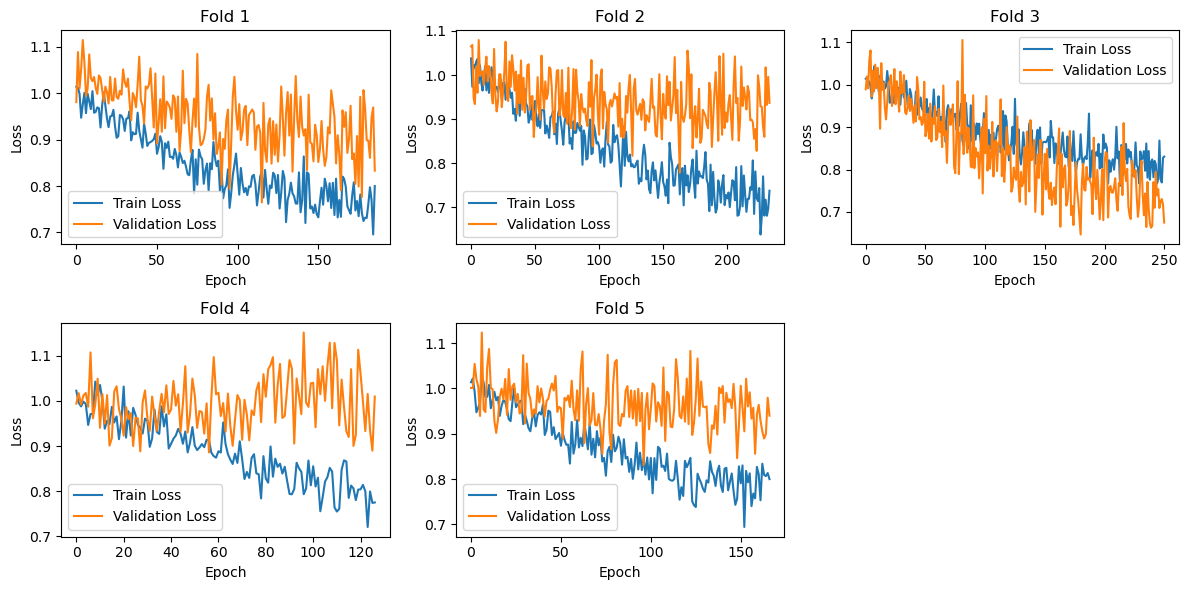

In [23]:
# print all losses for each fold on different subplots
plt.figure(figsize=(12, 6))
for i in range(N_FOLDS):
    plt.subplot(2, 3, i + 1)
    plt.plot(all_train_losses[i], label='Train Loss')
    plt.plot(all_val_losses[i], label='Validation Loss')
    plt.title(f'Fold {i + 1}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
plt.tight_layout()
plt.show()


## Testing

In [24]:
tennis_test_dataset = TennisMatchDataset([
                                            'past-stuttgart-atp-singles',
                                            'past-hertogenbosch-atp-singles',
                                          ])
nb_errors = 0
list_vectors_test = []
list_labels_test = []
list_matches_ids_test = []

list_vectors_test, list_labels_test, list_matches_ids_test, nb_errors = tennis_test_dataset.get_past_vectors()


print(f'Number of errors : {nb_errors} over {len(tennis_test_dataset.get_matches_ids())} matches')

print(f'Number of vectors : {len(list_vectors_test)}')
input_shapes = []
for i in range(len(list_vectors_test[0])):
    input_shapes.append(len(list_vectors_test[0][i]))
print(f'Input shapes : {input_shapes}')

# remove vectors where there is too much missing values ie too much c.PADDING values in all the vectors
new_list_vectors_test = []
new_list_labels_test = []
new_list_matches_ids_test = []

for i in tqdm(range(len(list_vectors_test))) :
    vector = list_vectors_test[i]
    num_padding = 0
    for spe_vec in vector :
        num_padding += spe_vec.count(c.PADDING)
    if num_padding < MAX_PADDED and list_labels_test[i] != c.PADDING:
        new_list_vectors_test.append(vector)
        new_list_labels_test.append(list_labels_test[i])
        new_list_matches_ids_test.append(list_matches_ids_test[i])
print(f'Number of vectors after removing vectors with too much missing values : {len(new_list_vectors_test)}')

tournament_features_vector_test = []
player1_features_vector_test = []
player2_features_vector_test = []
h2h_overall_vector_test = []
h2h_surface_vector_test = []
shape_overall_player1_vector_test = []
shape_overall_player2_vector_test = []

for vector in new_list_vectors_test:
    tournament_features_vector_test.append(vector[0])
    player1_features_vector_test.append(vector[1])
    player2_features_vector_test.append(vector[2])
    h2h_overall_vector_test.append(vector[3])
    h2h_surface_vector_test.append(vector[4])
    shape_overall_player1_vector_test.append(vector[5])
    shape_overall_player2_vector_test.append(vector[6])

# convert to pytorch tensor
tournament_features_tensor_test = torch.tensor(tournament_features_vector_test, dtype=torch.float)
tournament_features_mask_test = torch.zeros_like(tournament_features_tensor_test)
tournament_features_mask_test[tournament_features_tensor_test != c.PADDING] = 1.
player1_features_tensor_test = torch.tensor(player1_features_vector_test, dtype=torch.float)
player1_features_mask_test = torch.zeros_like(player1_features_tensor_test)
player1_features_mask_test[player1_features_tensor_test != c.PADDING] = 1.
player2_features_tensor_test = torch.tensor(player2_features_vector_test, dtype=torch.float)
player2_features_mask_test = torch.zeros_like(player2_features_tensor_test)
player2_features_mask_test[player2_features_tensor_test != c.PADDING] = 1.
h2h_overall_tensor_test = torch.tensor(h2h_overall_vector_test, dtype=torch.float)
h2h_overall_mask_test = torch.zeros_like(h2h_overall_tensor_test)
h2h_overall_mask_test[h2h_overall_tensor_test != c.PADDING] = 1.
h2h_surface_tensor_test = torch.tensor(h2h_surface_vector_test, dtype=torch.float)
h2h_surface_mask_test = torch.zeros_like(h2h_surface_tensor_test)
h2h_surface_mask_test[h2h_surface_tensor_test != c.PADDING] = 1.
shape_overall_player1_tensor_test = torch.tensor(shape_overall_player1_vector_test, dtype=torch.float)
shape_overall_player1_mask_test = torch.zeros_like(shape_overall_player1_tensor_test)
shape_overall_player1_mask_test[shape_overall_player1_tensor_test != c.PADDING] = 1.
shape_overall_player2_tensor_test = torch.tensor(shape_overall_player2_vector_test, dtype=torch.float)
shape_overall_player2_mask_test = torch.zeros_like(shape_overall_player2_tensor_test)
shape_overall_player2_mask_test[shape_overall_player2_tensor_test != c.PADDING] = 1.

label_vector = []
for label in new_list_labels_test:
    label_vector.append(label)

label_tensor_test = torch.tensor(label_vector)

test_dataset = TensorDataset(tournament_features_tensor_test, 
                             tournament_features_mask_test, 
                             player1_features_tensor_test, 
                             player1_features_mask_test, 
                             player2_features_tensor_test, 
                             player2_features_mask_test,
                             h2h_overall_tensor_test, 
                             h2h_overall_mask_test, 
                             h2h_surface_tensor_test, 
                             h2h_surface_mask_test, 
                             shape_overall_player1_tensor_test, 
                             shape_overall_player1_mask_test, 
                             shape_overall_player2_tensor_test, 
                             shape_overall_player2_mask_test, 
                             label_tensor_test)

test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

all_predictions = []
for j in range(N_FOLDS):
    model = TennisMatchPredictor(input_shapes)
    model.load_state_dict(torch.load(f'{c2.REPO_PATH}/tennis/models/best_model_fold_{j + 1}.pth'))
    model.eval()
    predictions = []
    with torch.no_grad():
        test_loss = 0.0
        for i, data in enumerate(test_dataloader):
            tournament_features, tournament_mask, player1_features, player1_mask, player2_features, player2_mask, h2h_overall, h2h_overall_mask, h2h_surface, h2h_surface_mask, shape_overall_player1, shape_overall_player1_mask, shape_overall_player2, shape_overall_player2_mask, labels = data
            outputs = model(tournament_features = tournament_features, 
                            player1_features = player1_features, 
                            player2_features = player2_features, 
                            h2h_overall = h2h_overall, 
                            h2h_surface = h2h_surface, 
                            shape_overall_player1 = shape_overall_player1, 
                            shape_overall_player2 = shape_overall_player2,
                            tournament_mask = tournament_mask, 
                            player1_mask = player1_mask, 
                            player2_mask = player2_mask, 
                            h2h_overall_mask = h2h_overall_mask,
                            h2h_surface_mask = h2h_surface_mask,
                            shape_overall_player1_mask = shape_overall_player1_mask,
                            shape_overall_player2_mask = shape_overall_player2_mask
                            )    
            predictions.append(outputs)        
            loss = criterion(outputs, labels.unsqueeze(1).float())
            test_loss += loss.item()
        print(f'Test Loss: for {j+1} : {test_loss/len(test_dataloader):.2f}')
    # find the matches where the model is the most confident and was right
    predictions = torch.cat(predictions).flatten()
    all_predictions.append(predictions)

all_predictions = torch.stack(all_predictions)
predictions = all_predictions.mean(dim=0)

# get the indexes of the matches where the model was right
# create data frame with the predictions and the labels and the match ids
df = pd.DataFrame(columns=['match_id', 'predictions', 'labels'])
df['predictions'] = predictions
df['labels'] = label_tensor_test
df['match_id'] = new_list_matches_ids_test
# order the data frame by predictions values
df = df.sort_values(by='predictions', ascending=False)

# fetch the odds of betclic for the matches
odds_1_list = []
odds_2_list = []
prob_list = []
for match_id in df['match_id']:
    match_odds =tennis_test_dataset.get_match(match_id).get_odds()
    odds_found = False
    for match_odd in match_odds:
        if match_odd['bookmaker'] == 'Betclic.fr':
            odds_found = True
            odds_1_list.append(float(match_odd['odds'][0]))
            odds_2_list.append(float(match_odd['odds'][1]))
            player1odd = float(match_odd['odds'][0])
            player2odd = float(match_odd['odds'][1])
            prob_win_player1 = 1/player1odd
            prob_win_player2 = 1/player2odd
            # normalize the probabilities
            prob_sum = prob_win_player1 + prob_win_player2
            prob_win_player1 = prob_win_player1/prob_sum
            prob_win_player2 = prob_win_player2/prob_sum
            prob_list.append(2*prob_win_player1-1)
            break
    if not odds_found:
        odds_1_list.append(None)
        odds_2_list.append(None)
        prob_list.append(None) 

df['odds_1'] = odds_1_list
df['odds_2'] = odds_2_list
df['bookmaker_pred'] = prob_list
df = df.loc[df['odds_1'].notnull()]

Loading data for tournaments {'past-hertogenbosch-atp-singles', 'past-stuttgart-atp-singles'} ...


FileNotFoundError: [Errno 2] No such file or directory: '/users/eleves-b/2021/mathias.grau/betbot_tennis/tennis/data/files/matches/past-stuttgart-atp-singles.json'

## Betting

In [ ]:
CONFIDENCE_THRESHLOLD = 0.5


# Kelly criterion
def kelly_criterion(odds, prob, safe=0.1):
    return (prob - (1- prob)/(odds))*safe

bet_on_player_1_df = df.loc[df['predictions'] > CONFIDENCE_THRESHLOLD].copy()
bet_on_player_1_df['prediction_prob']= bet_on_player_1_df['predictions'].apply(lambda x : (1+x)/2)
bet_on_player_1_df['kelly_criterion'] = bet_on_player_1_df.apply(lambda row : kelly_criterion(row['odds_1'], row['prediction_prob']), axis=1)
bet_on_player_2_df = df.loc[df['predictions'] < -CONFIDENCE_THRESHLOLD].copy()
bet_on_player_2_df['prediction_prob']= bet_on_player_2_df['predictions'].apply(lambda x : (1-x)/2)
bet_on_player_2_df['kelly_criterion'] = bet_on_player_2_df.apply(lambda row : kelly_criterion(row['odds_2'], row['prediction_prob']), axis=1)
bet_on_player_2_df = bet_on_player_2_df.sort_values(by='predictions', ascending=True)

# Strategy results : bet the proportion given by the kelly criterion on each match
INIT_AMOUNT = 100 # euros
GREEN = '\033[92m'
RED = '\033[91m'
RESET = '\033[0m'
# bet on player 1
total_amount = INIT_AMOUNT
for i, row in bet_on_player_1_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = row['kelly_criterion']*total_amount
    if row['labels'] == 1:
        total_amount += amout_to_bet*(row['odds_1']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 1, ({row['prediction_prob']:.2f}) amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")
    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 1, ({row['prediction_prob']:.2f}) amount to bet : {amout_to_bet:.2f}, odds : {row['odds_1']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")

    

# bet on player 2
for i, row in bet_on_player_2_df.iterrows():
    player1 = tennis_test_dataset.get_match(row['match_id']).get_players()[0]
    player2 = tennis_test_dataset.get_match(row['match_id']).get_players()[1]
    amout_to_bet = row['kelly_criterion']*total_amount
    if row['labels'] == -1:
        total_amount += amout_to_bet*(row['odds_2']-1)
        print(f"{GREEN}Match : {row['match_id']} {player1} - {player2}, bet on player 2, ({row['prediction_prob']:.2f}) amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")

    else:
        total_amount -= amout_to_bet
        print(f"{RED}Match : {row['match_id']} {player1} - {player2}, bet on player 2, ({row['prediction_prob']:.2f}) amount to bet : {amout_to_bet:.2f}, odds : {row['odds_2']:.2f}, label : {row['labels']:.2f}, total amount : {total_amount:.2f}{RESET}")



print(f"\nTotal amount after betting : {total_amount:.2f}")
if total_amount > INIT_AMOUNT:
    print(f"{GREEN}Relative won {(total_amount-INIT_AMOUNT)/INIT_AMOUNT*100:.2f}%{RESET}")
else:
    print(f"{RED}Relative lost {(INIT_AMOUNT-total_amount)/INIT_AMOUNT*100:.2f}%{RESET}")

Match : 0IDqU7O7 De Minaur A. - Korda S., bet on player 1, (0.77) amount to bet : 6.19, odds : 1.49, label : 1.00, total amount : 103.03
Match : nctXlgGr De Minaur A. - Raonic M., bet on player 1, (0.76) amount to bet : 5.86, odds : 1.31, label : 1.00, total amount : 104.85

Total amount after betting : 104.85
Relative won 4.85%
